# Prediksi Biaya Asuransi Kesehatan

In [1]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
# Menghubungkan google drive ke google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
# src https://www.kaggle.com/datasets/mirichoi0218/insurance
df_path = '/content/drive/MyDrive/medical_insurance_cost.csv'
df = pd.read_csv(df_path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis (Deskripsi Variabel)

Variabel-variabel yang ada pada dataset Obesity di atas adalah sebagai berikut:
* charges (Target): merepresentasikan tagihan biaya rumah sakit.
* age: merepresentasikan umur.
* sex: merepresentasikan jenis kelamin.
* bmi: merepresentasikan nilai keidealan berat tubuh seseorang (18.5 ≤ BMI < 24.9 → Normal)
* children: merepresentasikan jumlah anak yang dimiliki.
* smoker: merepresentasikan perokok atau tidak (yes/no).
* region: merepresentasikan wilayah geografis tempat tinggal.

Setelah memahami deskripsi dari tiap variabel pada dataset. Selanjutnya adalah mengecek informasi dari dataset menggunakan fungsi info().

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Dari output dapat dilihat bahwa:
* Terdapat 3 kolom dengan tipe data object, yaitu: sex, smoker dan region (Fitur non-numerik).
* Terdapat 2 kolom dengan tipe data float dan 2 kolom dengan tipe data int, yaitu: bmi dan charges untuk tipe data float dan age dan chilren untuk tipe data int
 (Fitur numerik).

Setelah ditelusuri, tidak ada yang salah dengan tipe data. Selanjutnya, mari cek deskripsi statistik data dengan fungsi describe().

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Seperti yang dapat dilihat, fungsi describe() memberikan informasi statistik seperti:
* Count adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum setiap kolom.
* 25% adalah kuartil pertama. (Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama)
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.

## Exploratory Data Analysis (Menangani Missing Value dan Outliers)

### Menangani Missing Value

Sebelum beranjak lebih jauh kita perlu mengatasi missing value jika ada. Mari lihat apakah ada missing value dengan menjalankan kode berikut.

In [6]:
df.isnull().values.any()

False

Ternyata False, itu artinya dataset ini tidak memiliki missing value.

### Menangani Outliers

Selain missing value, kita juga perlu menangani outliers jika ada. Mari visualisasikan beberapa data untuk melihat apakah ada outliers pada dataset ini. Mari lihat data apa yang bisa divisualisasikan dengan fungsi describe().

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Visualisasikan data medical_insurance_cost dengan boxplot untuk mendeteksi outliers pada fitur numerik.

<Axes: xlabel='age'>

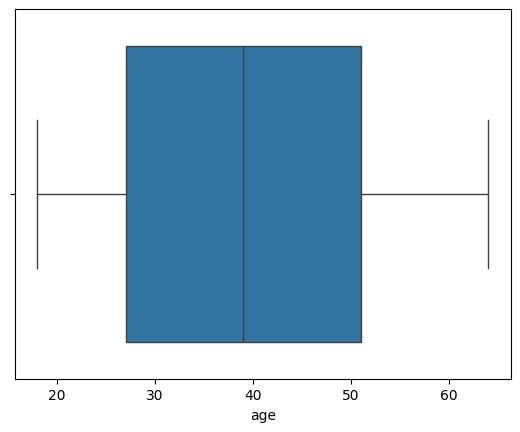

In [8]:
# age
sns.boxplot(x=df['age'])

<Axes: xlabel='bmi'>

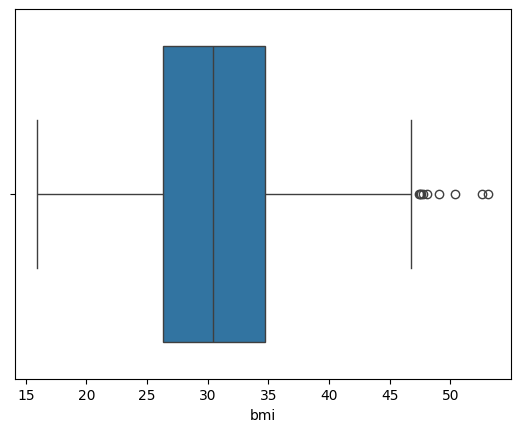

In [9]:
# bmi
sns.boxplot(x=df['bmi'])

<Axes: xlabel='children'>

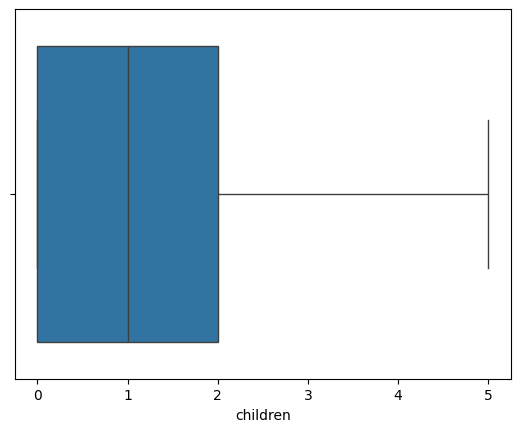

In [10]:
# children
sns.boxplot(x=df['children'])

Dari apa yang dapat dilihat ternyata ada outliers. Mari implementasikan metode Inter Quartile Range (IQR) untuk mengatasi outliers.

In [11]:
numeric_features = ['age', 'bmi', 'children', 'charges']

Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_features]<(Q1-1.5*IQR))|(df[numeric_features]>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah drop outliers
df.shape

(1193, 7)

Dari sebelumnya memiliki 1338 row data sekarang menjadi 1193 karena beberapa row memiliki outliers.

## Exploratory Data Analysis (Univariate Analysis)

Sebelum melangkah lebih jauh, kita perlu melakukan analisis pada satu variabel dalam satu waktu. Hal ini bertujuan agar kita dapat memahami distribusi data, seperti apakah data tersebut normal atau tidak.

Bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features

In [12]:
numerical_features = ['age', 'bmi', 'children', 'charges']
categorical_features = ['sex', 'smoker', 'region']

Pertama, lakukan analisis terhadap fitur kategori.

### Categorical Features

        Jumlah sampel  Persentase
sex                              
female            611        51.2
male              582        48.8


<Axes: title={'center': 'sex'}, xlabel='sex'>

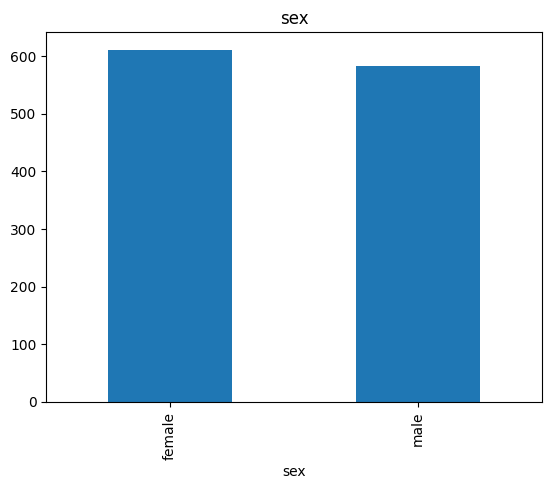

In [13]:
# sex
feature = categorical_features[0]
count = df[feature].value_counts()
percentage = 100*df[feature].value_counts(normalize=True)
df_sex = pd.DataFrame({"Jumlah sampel":count, "Persentase":percentage.round(1)})
print(df_sex)
count.plot(kind='bar', title=feature)

        Jumlah sampel  Persentase
smoker                           
no               1055        88.4
yes               138        11.6


<Axes: title={'center': 'smoker'}, xlabel='smoker'>

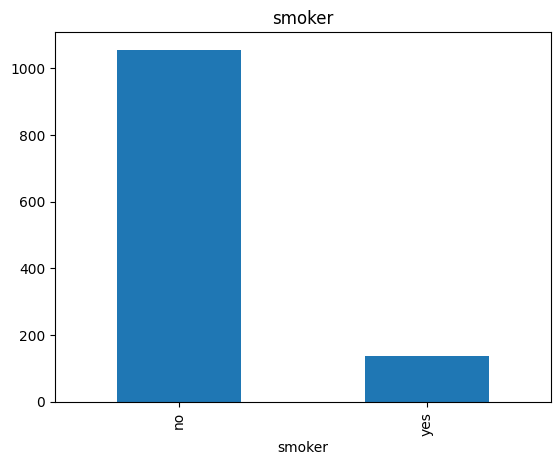

In [14]:
# smoker
feature = categorical_features[1]
count = df[feature].value_counts()
percentage = 100*df[feature].value_counts(normalize=True)
df_smoker = pd.DataFrame({"Jumlah sampel":count, "Persentase":percentage.round(1)})
print(df_smoker)
count.plot(kind='bar', title=feature)

           Jumlah sampel  Persentase
region                              
northwest            305        25.6
southeast            302        25.3
northeast            295        24.7
southwest            291        24.4


<Axes: title={'center': 'region'}, xlabel='region'>

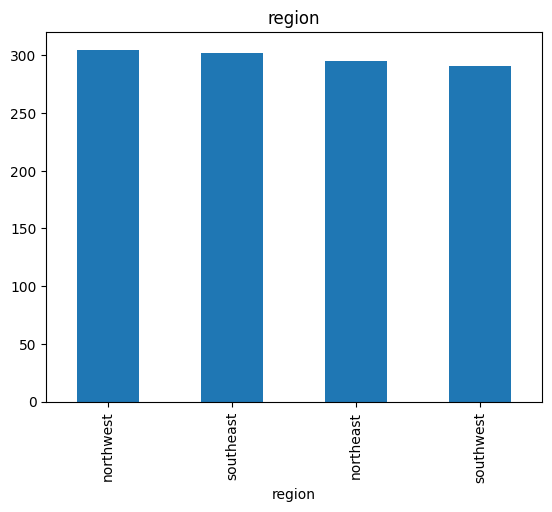

In [15]:
# region
feature = categorical_features[2]
count = df[feature].value_counts()
percentage = 100*df[feature].value_counts(normalize=True)
df_region = pd.DataFrame({"Jumlah sampel":count, "Persentase":percentage.round(1)})
print(df_region)
count.plot(kind='bar', title=feature)

### Numerical Features

Setelah menganalisis fitur kategori, selanjutnya menganalisis fitur numerik.

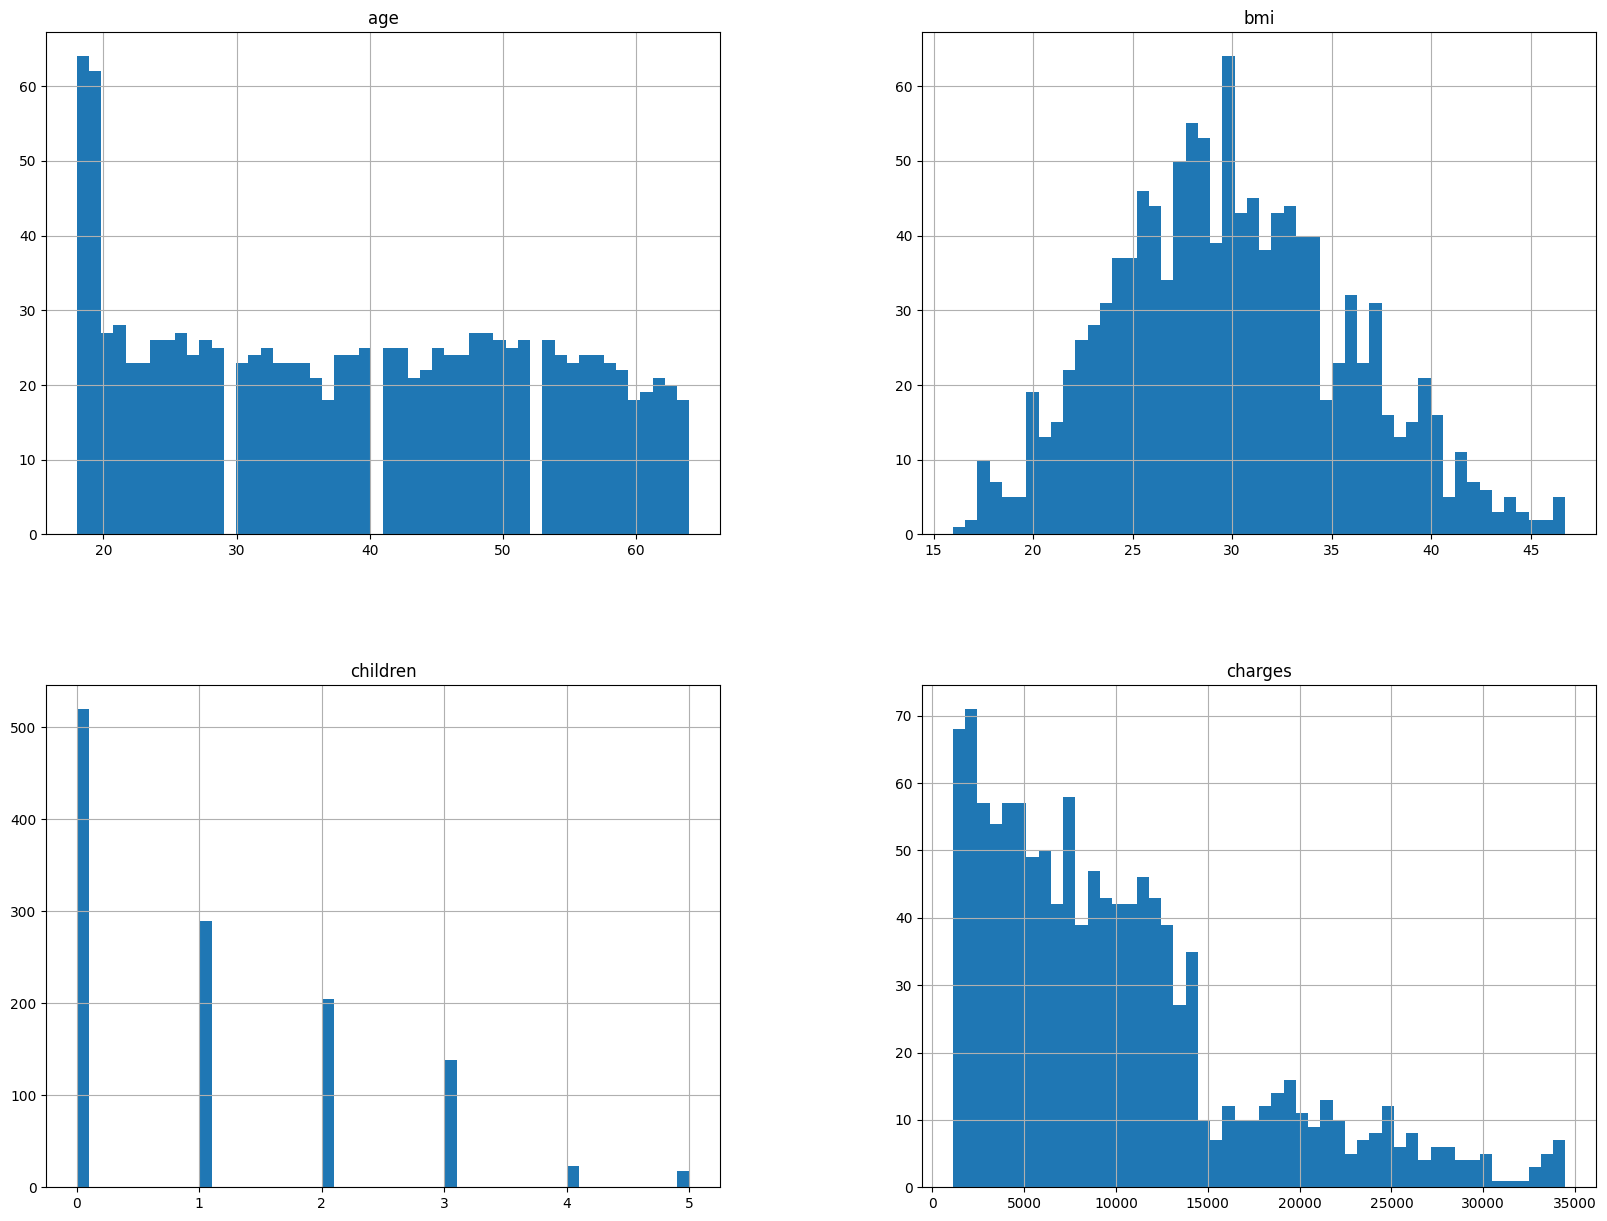

In [16]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Exploratory Data Analysis (Multivariate Analysis)

### Categorical Features

Cek rata-rata biaya terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap biaya.

<ipython-input-17-cd949cba4a25>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='charges', kind='bar', dodge=False, height=4, aspect=3, data=df, palette='Set3')
<ipython-input-17-cd949cba4a25>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='charges', kind='bar', dodge=False, height=4, aspect=3, data=df, palette='Set3')
<ipython-input-17-cd949cba4a25>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='charges', kind='bar', dodge=False, height=4, aspect=3, data=df, palette='Set3')


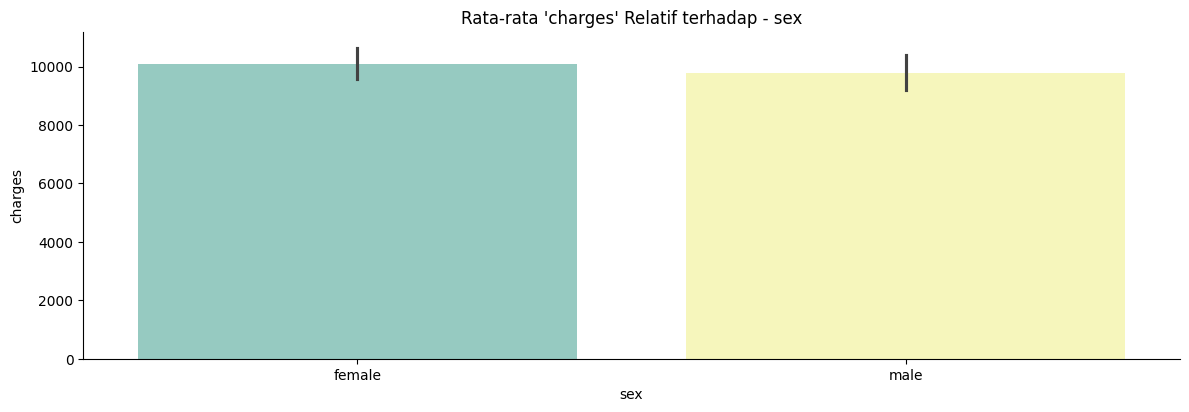

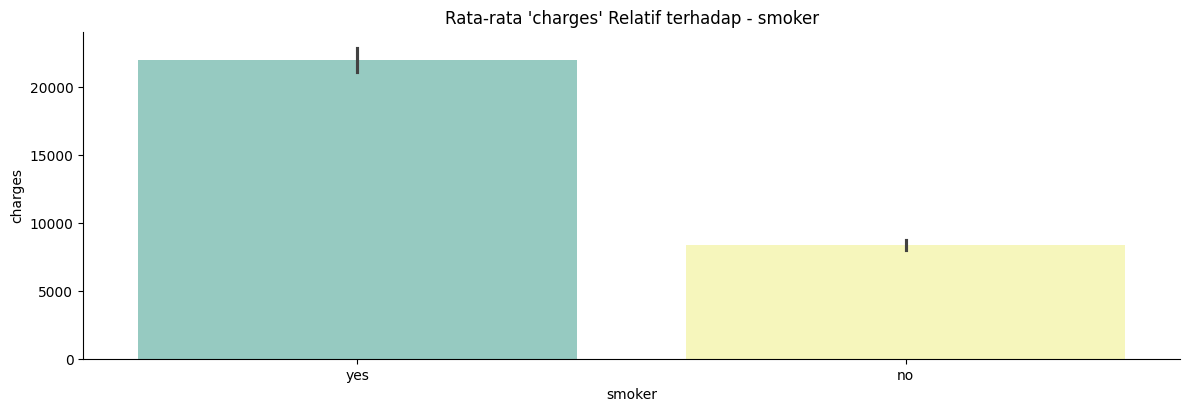

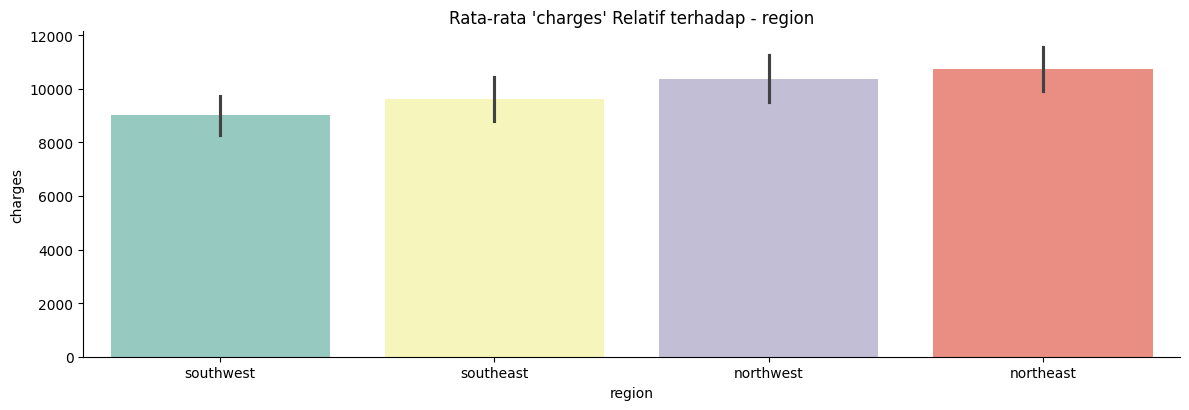

In [17]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='charges', kind='bar', dodge=False, height=4, aspect=3, data=df, palette='Set3')
  plt.title("Rata-rata 'charges' Relatif terhadap - {}".format(col))

Dengan mengamati rata-rata biaya relatif terhadap fitur kategori di atas, kita memperoleh insight sebagai berikut:
* Pada fitur 'sex', rata-rata biaya untuk laki-laki dan perempuan terlihat hampir sama. Hal ini menunjukkan bahwa 'sex' bukan faktor utama yang mempengaruhi biaya kesehatan.
* Pada fitur 'smoker', perokok memiliki rata-rata biaya yang lebih tinggi daripada yang non-perokok. Perbedaan ini menunjukkan bahwa merokok memiliki dampak besar terhadap peningkatan biaya kesehatan.
* Pada fitur 'region', rata-rata biaya kesehatan di tiap wilayah berbeda-beda, tetapi tidak menunjukkan perbedaan yang begitu signifikan.


Kesimpulannya, fitur 'smoker' memiliki dampak besar terhadap peningkatan biaya kesehatan. Fitur 'sex' tidak begitu memiliki pengaruh yang signifikan. Dan fitur 'region' memiliki pengaruh, namun tidak sebesar fitur 'smoker'.

### Numerical Features

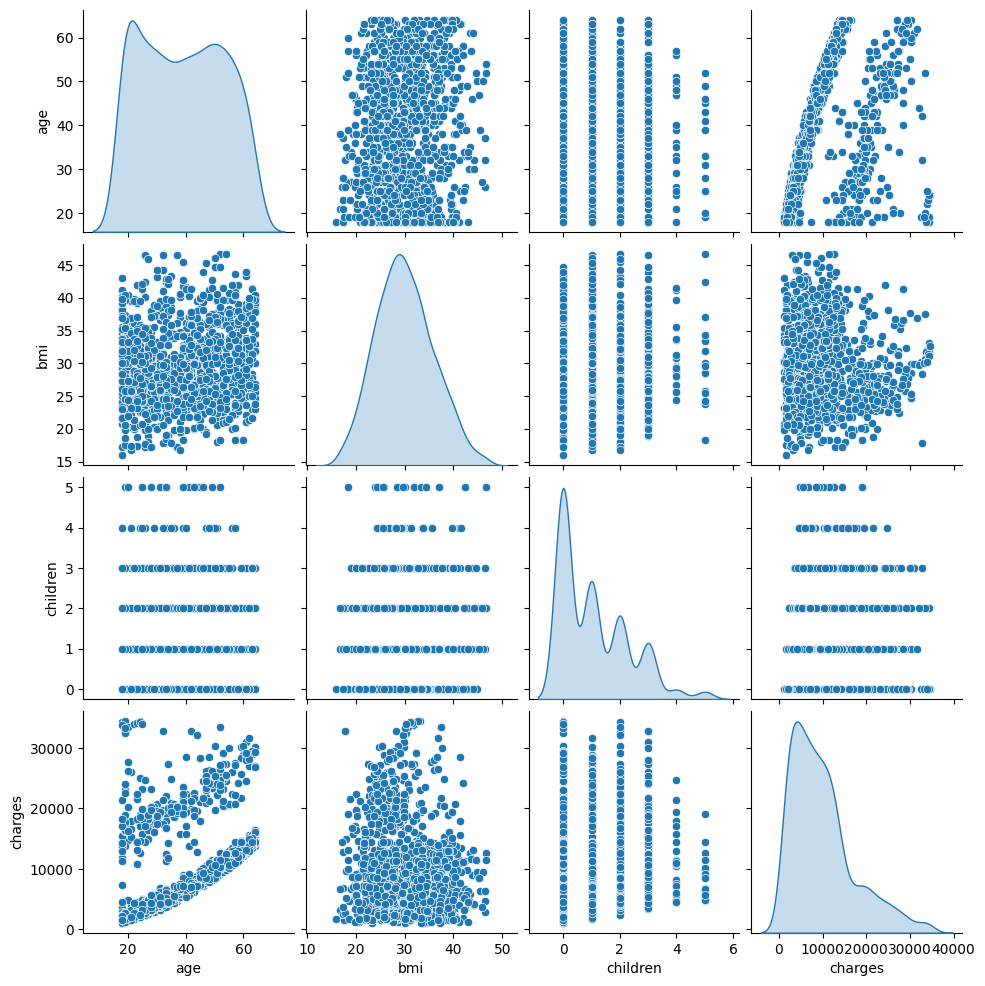

In [18]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Berdasarkan pairplot yang ditampilkan, berikut beberapa insight yang diperoleh:
* Fitur age dan charges: Terdapat pola melengkung yang menunjukkan bahwa semakin tua usia pasiennya, kemungkinan biaya kesehatannya juga akan semakin tinggi.
* Fitur bmi dan charges: Terlihat beberapa pola yang menunjukkan bahwa pasien dengan BMI lebih tinggi cenderung memiliki biaya yang lebih tinggi juga.
* Fitur children dan charges: Data menunjukkan distribusi yang cukup merata. Sehingga, tampaknya tidak ada korelasi yang kuat antara fitur children dan charges.

Dari insight di atas, kemungkinan besar faktor utama yang mempengaruhi biaya (charges) adalah fitur age dan bmi.

Untuk mengukur skor korelasinya, mari gunakan fungsi corr()

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

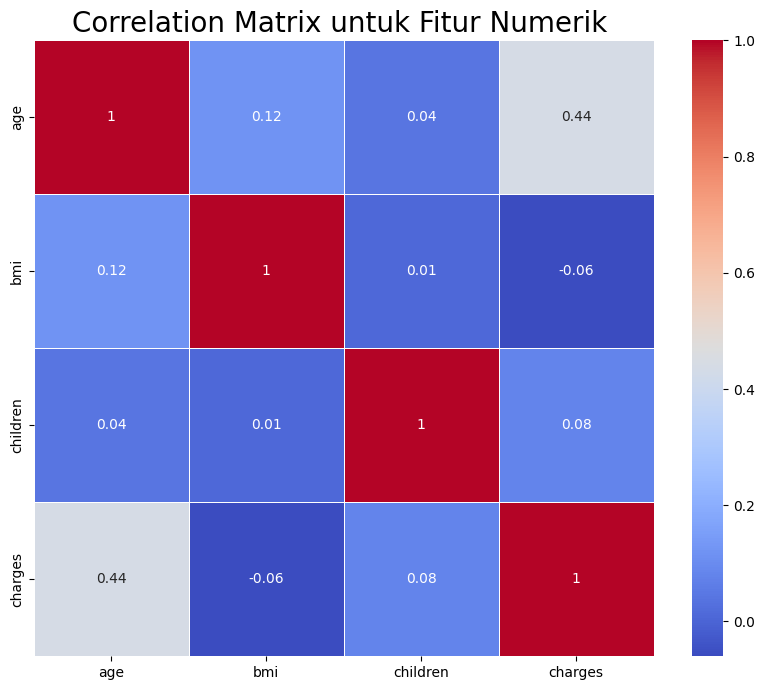

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Berdasarkan Correlation Matrix yang ditampilkan di atas, berikut beberapa insight yang dapat diperoleh:
* Korelasi fitur age dan charges (0.44): Terdapat korelasi positif sedang antara age dan charges. Ini menunjukkan semakin tua seseorang, semakin besar pula biaya kesehatannya.
* Korelasi fitur bmi dan charges (-0.06): Korelasi antara bmi dan charges sangatlah kecil, bahkan negatif. Kita mengharapkan korelasi ini bernilai positif, karena BMI yang lebih tinggi sering dikaitkan dengan resiko penyakit. Namun, korelasi kecil ini dapat terjadi jika faktor lain, seperti merokok memiliki pengaruh lebih besar terhadap biaya.
* Korelasi fitur children dan charges (0.08): Gambar di atas menunjukkan hampir tidak ada korelasi antara children dan charges. Sehingga, memiliki lebih banyak anak tidak secara langsung meningkatkan biaya kesehatan seseorang.

Dari insight di atas, kesimpulan yang dapat diambil adalah:
* Fitur age merupakan fitur numerik yang paling mempengaruhi biaya kesehatan.
* Fitur bmi dan children memiliki pengaruh yang kecil terhadap biaya kesehatan.
* Ada kemungkinan bahwa faktor kategorikal (seperti fitur smoker yang terlihat sangat berpengaruh pada grafik sebelumnya) lebih menentukan biaya kesehatan seseorang daripada fitur numerik.

Dari kesimpulan di atas dapat dilihat bahwa fitur children memiliki pengaruh yang sangat kecil terhadap biaya. Sehingga, fitur tersebut dapat di-drop.

In [20]:
df.drop(['children'], inplace=True, axis=1)
df.head()

<ipython-input-20-ec72f82e4997>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['children'], inplace=True, axis=1)


,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


## Data Preparation

### Encoding Fitur Kategori

Agar model kita dapat memproses fitur kategori, kita perlu melakukan encoding terhadap fitur kategori. Pada fitur sex dan smoker akan kita lakukan label encoding, karena kedua fitur ini hanya memiliki 2 kategori (male dan female untuk kategori sex, yes dan no untuk kategori smoker). Dan one hot encoding untuk fitur region karena memiliki lebih dari 2 kategori (northeast, southeast, northwest, southwest).

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding untuk fitur sex dan smoker
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex']) # female = 0, male = 1
df['smoker'] = le.fit_transform(df['smoker']) # no = 0, yes = 1

# One Hot Encoding untuk region
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_region = ohe.fit_transform(df[['region']])

# Konversi hasil encoding ke DataFrame dan pastikan index tetap sama
encoded_region_df = pd.DataFrame(encoded_region, columns=ohe.get_feature_names_out(['region']))
encoded_region_df.index = df.index  # Pastikan index tetap sama agar tidak menyebabkan NaN pada beberapa baris

# Gabungkan dengan dataset utama
df_final = pd.concat([df.drop(columns=['region']), encoded_region_df], axis=1)

# Pastikan semua kolom hasil encoding dalam format integer
df_final[encoded_region_df.columns] = df_final[encoded_region_df.columns].astype(int)

# Cek hasil encoding
df_final.head()

<ipython-input-21-948c9c0d0d7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = le.fit_transform(df['sex']) # female = 0, male = 1
<ipython-input-21-948c9c0d0d7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoker'] = le.fit_transform(df['smoker']) # no = 0, yes = 1


,age,sex,bmi,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,1,16884.92400,0,0,1
1,18,1,33.770,0,1725.55230,0,1,0
2,28,1,33.000,0,4449.46200,0,1,0
3,33,1,22.705,0,21984.47061,1,0,0
4,32,1,28.880,0,3866.85520,1,0,0


Setelah melakukan encoding seperti di atas, fitur kategori akan menjadi:
* sex

  female = 0, male = 1
* smoker

  no= 0, yes = 1
* region

  northeast = [0, 0, 0]

  northwest = [1, 0, 0]

  southeast = [0, 1, 0]
  
  southwest = [0, 0, 1]

### Train-Test Split

Tahap selanjutnya adalah melakukan train-test split. Karena jumlah data yang dimiliki cukup banyak, kita kan menggunakan proporsi pembagian sebesar 80:20.

In [22]:
df_final.shape

(1193, 8)

In [23]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['charges'], axis=1)
y = df_final['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [24]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train set: {len(X_train)}')
print(f'Total # of sample in test set: {len(X_test)}')

Total # of sample in whole dataset: 1193
Total # of sample in train set: 954
Total # of sample in test set: 239


### Standarisasi

Pada proyek ini, kita akan menggunakan algoritma XGBoost. Jadi, fitur seperti age dan bmi tidak perlu distandarisasi karena XGBoost tidak bergantung pada skala fitur. Dan juga, age dan bmi sudah memiliki skala dan arti medis yang jelas.

In [25]:
df_final

,age,sex,bmi,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,1,16884.92400,0,0,1
1,18,1,33.770,0,1725.55230,0,1,0
2,28,1,33.000,0,4449.46200,0,1,0
3,33,1,22.705,0,21984.47061,1,0,0
4,32,1,28.880,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,0,10600.54830,1,0,0
1334,18,0,31.920,0,2205.98080,0,0,0
1335,18,0,36.850,0,1629.83350,0,1,0
1336,21,0,25.800,0,2007.94500,0,0,1


## Model Development

### Inisialisasi Model

Di sini kita akan menggunakan algoritma XGBoost. Mari inisialisasi model terlebih dahulu.

In [26]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Inisialisasi model
model = XGBRegressor(n_estimators=30, learning_rate=0.01, random_state=36)

Berikut adalah parameter yang digunakan:
* n_estimators: Jumlah trees (pohon) dalam boosting.
* learning_rate: Mengontrol seberapa besar perubahan yang dilakukan oleh setiap pohon baru terhadap model sebelumnya.
* random_state: digunakan untuk mengontrol keacakan dalam pelatihan model, sehingga hasil yang didapat konsisten setiap kali model dijalankan.

In [27]:
# Latih model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=36, ...)

### Evaluasi Model

Mari kita evaluasi model kita menggunakan metrik MSE dengan kode berikut.

In [28]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['XGB'])

# Hitung Mean Squared Error algoritma pada data train dan test
mse.loc['XGB', 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e8
mse.loc['XGB', 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e8

# Panggil mse
mse

,train,test
XGB,0.364104,0.373542


Untuk memudahkan, mari kita plot metrik tersebut dengan bar chart dengan kode berikut.

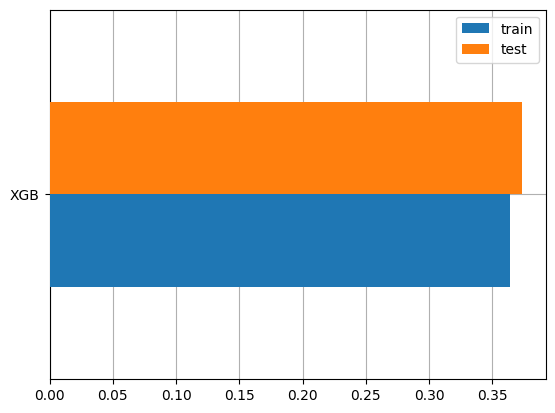

In [29]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Untuk menguji model yang telah diinisialisasi, mari jalankan kode berikut.

In [30]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
pred_dict['y_pred'] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,y_pred
274,2523.16950,8168.000000
1040,20234.85475,12466.900391
483,9880.06800,9938.900391
638,20149.32290,12466.900391
190,12557.60530,11144.099609
767,7050.64200,9264.000000
43,6313.75900,9372.400391
650,9800.88820,9731.599609
535,6067.12675,9101.200195
1333,10600.54830,10170.299805


### Hyperparameter Tuning

Setelah melihat uji model seperti pada tabel di atas, dapat disimpulkan bahwa model belum begitu baik kinerjanya. Hal ini dapat dilihat dari nilai 'y_pred' yang masih terlampau jauh dari 'y_true'. Maka dari itu, selanjutnya kita akan melakukan hyperparameter tuning. Pada proyek ini, metode yang digunakan adalah Grid Search.

In [31]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi parameter yang akan dituning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
}

# Melakukan Grid Search
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", grid_search.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300}
Best Score (MSE): -19720903.140943486


Setelah melakukan grid search terhadap parameter, selanjutnya kita akan memilih parameter yang terbaik dengan kode berikut.

In [32]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300}


Setelah memilih parameter terbaik, selanjutnya latih ulang model dengan parameter yang telah dipilih.

In [33]:
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Mari kita evaluasi ulang model kita.

In [34]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['XGB'])

# Hitung Mean Squared Error algoritma pada data train dan test
mse.loc['XGB', 'train'] = mean_squared_error(y_true=y_train, y_pred=final_model.predict(X_train))/1e8
mse.loc['XGB', 'test'] = mean_squared_error(y_true=y_test, y_pred=final_model.predict(X_test))/1e8

# Panggil mse
mse

,train,test
XGB,0.183073,0.163774


Lakukan plot ulang untuk melihat metrik dengan jelas.

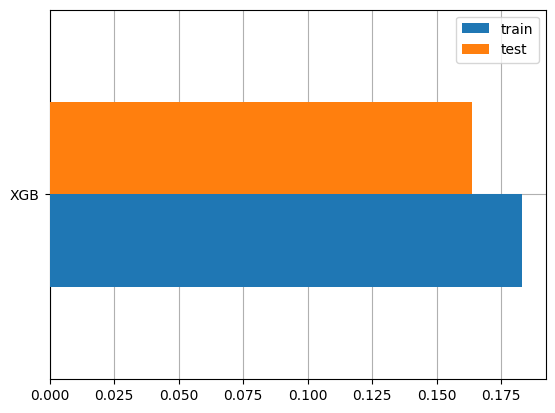

In [35]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dapat dilihat dari yang sebelumnya mse bernilai sekitar 0,36 pada train dan 0,35 pada test, sekarang hanya menjadi 0,18 pada train dan 0,16 pada test. Ini berarti kita telah berhasil melakukan hyperparameter tuning terhadap model dan kinerja model menjadi lebih baik.

Jalankan kode berikut untuk menguji ulang model yang telah dituning.

In [36]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
pred_dict['y_pred'] = final_model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,y_pred
274,2523.16950,5359.500000
1040,20234.85475,19732.199219
483,9880.06800,10846.900391
638,20149.32290,19771.800781
190,12557.60530,14656.200195
767,7050.64200,7685.899902
43,6313.75900,7381.500000
650,9800.88820,10817.099609
535,6067.12675,7461.200195
1333,10600.54830,11545.000000
